In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

In [3]:
# Set path
data_dir = 'D:\\Dataset'

In [5]:
# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 13

In [7]:
# Data generators with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [9]:
# Number of classes
num_classes = train_gen.num_classes

# Model definition
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [41]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

loss, accuracy = model.evaluate(val_gen)
print(f"\nTotal Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 48s 328ms/step - accuracy: 0.5669 - loss: 0.9127 - val_accuracy: 0.7149 - val_loss: 0.4794
Epoch 2/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - accuracy: 0.7762 - loss: 0.4818 - val_accuracy: 0.8348 - val_loss: 0.3872
Epoch 3/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - accuracy: 0.8178 - loss: 0.4304 - val_accuracy: 0.8783 - val_loss: 0.2965
Epoch 4/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.8536 - loss: 0.3710 - val_accuracy: 0.8188 - val_loss: 0.3838
Epoch 5/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 46s 322ms/step - accuracy: 0.8413 - loss: 0.3848 - val_accuracy: 0.8783 - val_loss: 0.2687
Epoch 6/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 45s 321ms/step - accuracy: 0.8698 - loss: 0.3509 - val_accuracy: 0.8837 - val_loss: 0.2652
Epoch 7/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 46s 329ms/step - accuracy: 0.8758 - loss: 0.3142 - val_accuracy: 0.8961 - val_loss: 0.2672
Epoch 8/13
141/141 ━━━━━━━━━━━━━━━━━━━━ 45s 316ms/step - accuracy: 0.8758 - loss: 0

In [45]:
# Save the model
model.save('satellite_classification_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
CloudImg.png: cloudy


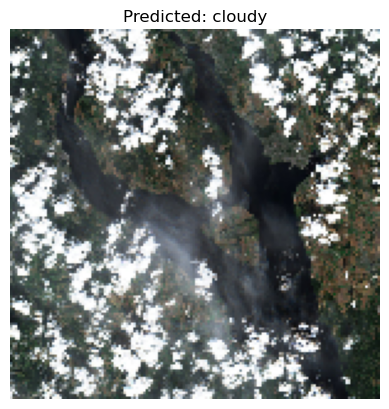

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
desert(68).jpg: desert


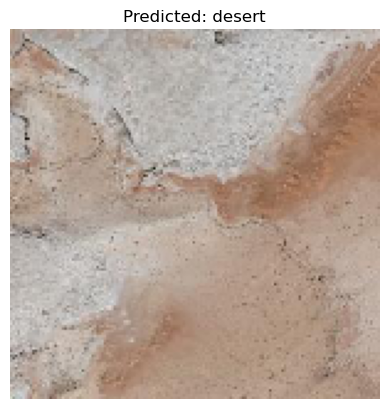

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
DesertImg.png: desert


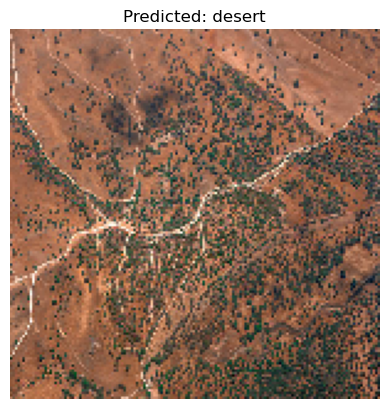

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Forest_302.jpg: green_area


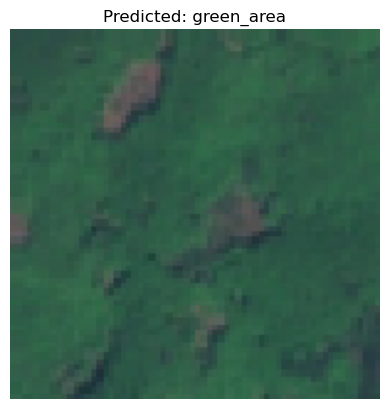

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
GreenImg.png: green_area


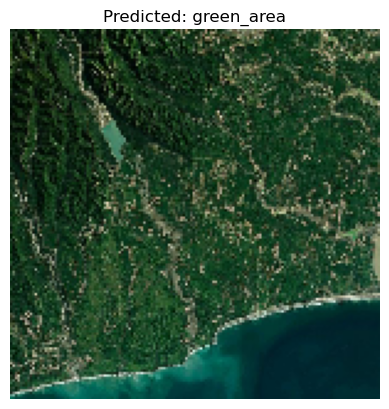

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
SeaImg.png: water


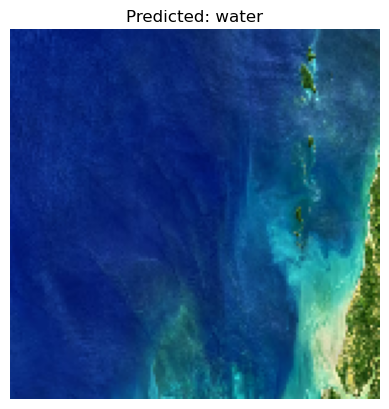

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
SeaLake_121.jpg: water


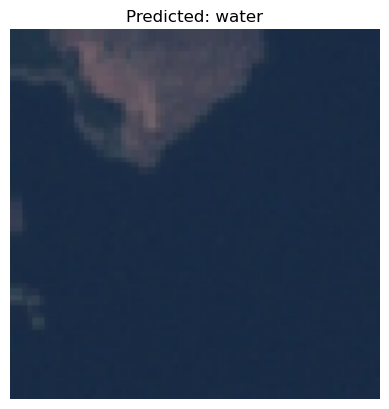

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
SeaLake_63.jpg: water


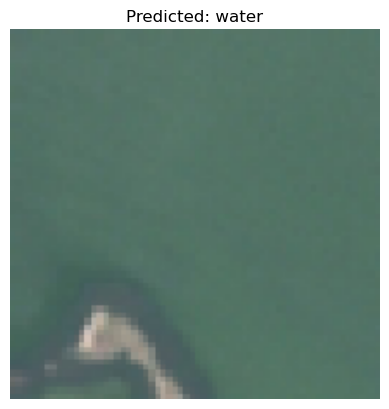

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
train_2516.jpg: cloudy


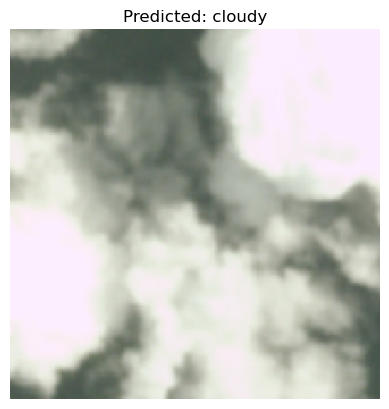

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
train_413.jpg: cloudy


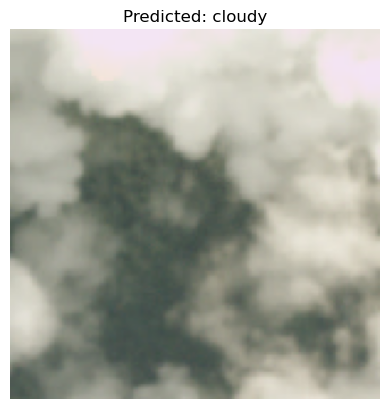

In [13]:
model = load_model('satellite_classification_model.keras', compile=False)
class_labels = list(train_gen.class_indices.keys())

img_dir = 'D:\\Dataset'  # your test images folder
img_size = (img_height, img_width)

for img_name in os.listdir(img_dir):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(img_dir, img_name)
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction)]

        print(f"{img_name}: {predicted_class}")
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis('off')
        plt.show()
